# Telco Customer Churn Analysis

### by Yueh-Han Chen

### Dataset Overview

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
https://www.kaggle.com/blastchar/telco-customer-churn  Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.

### Research Questions:
1. For two groups of those who unsubscribed and still are paying the service, how long did them usually stay in the service? and what was their average LTV(Life Time Value)?

2. For two groups of those who unsubscribed and still are paying the service, what are the proportion of people used and using phone service?

3. For two groups of those who unsubscribed and still are paying the service, what are the proportion of people used and using phone service with muiltple lines?

4. For two groups of those who unsubscribed and still are paying the service, what are the proportion of people used and using internet service?

5. For two groups of those who unsubscribed and still are paying the service, what are the proportion of people used and using each subset of internet service?

6. For those who are still in service with LTV higher than the average LTV of leaked customers, what are the differences compared to general data in each service?

7. For two groups of those who unsubscribed and still are paying the service, what is the proportion of each kinds of contract by each group?
 
8. Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("ignore")

clean_df = pd.read_csv('Telco-Customer-Churn_clean.csv')

In [2]:
# build function
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

## Research Question 1: For those who unsubscribed and still are paying the service,  how long did they usually stay in the service? and what was their average LTV(Life Time Value)?

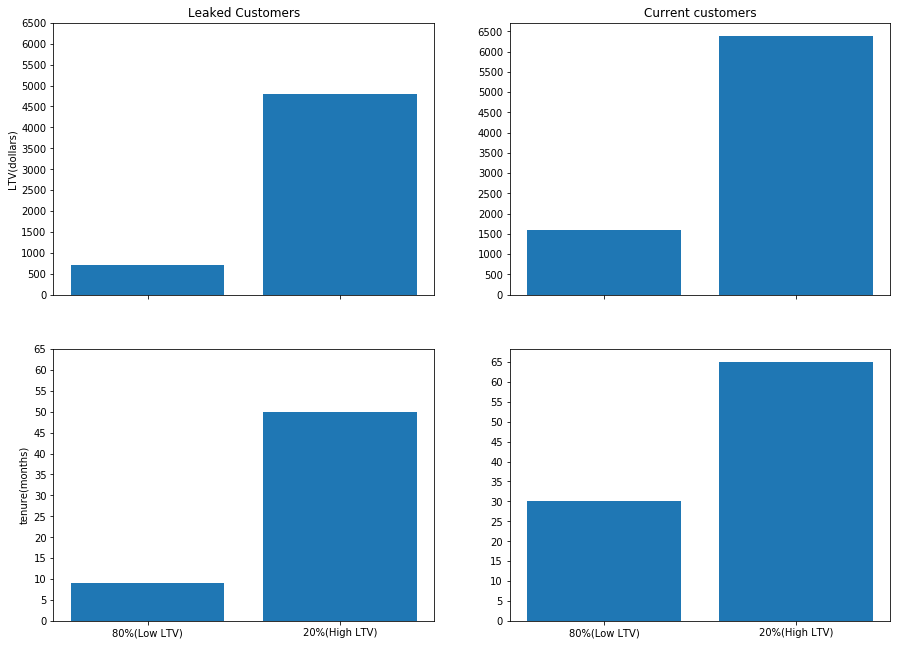

In [157]:
plt.figure(figsize = [15, 11])
# left plot: LTV by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 1)
plt.bar([1, 2], [713, 4801])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''],ylabel='LTV(dollars)', title='Leaked Customers')
# # right plot: Tenure by above and under 80th percentile of data who unsubscribed
plt.subplot(2, 2, 2)
plt.bar([1, 2], [1589, 6389])
desc(yticks1=range(0,7000,500), yticks2=range(0,7000,500), xticks1=[1,2],xticks2=['', ''], title='Current customers')

# left plot: LTV by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 3)
plt.bar([1, 2], [9, 50])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5),xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'],ylabel='tenure(months)')

# # right plot: Tenure by above and under 80th percentile of data who are still paying the service
plt.subplot(2, 2, 4)
plt.bar([1, 2], [30, 65])
desc(yticks1=range(0,70,5), yticks2=range(0,70,5), xticks1=[1,2],xticks2=['80%(Low LTV)', '20%(High LTV)'])

## Research Question 2: For those who unsubscribed and still are paying the service, what are the proportion of people used and using phone service?

In [66]:
# Extract those who unsubscribed the service
Churn_df = clean_df.query('Churn=="Yes"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
TotalCharges_under80 = Churn_df.query('TotalCharges<=2827.59')
TotalCharges_above80 = Churn_df.query('TotalCharges>2827.59')
# Extract those who are paying the service
paying_df = clean_df.query('Churn=="No"')
# Divide the data by the 80th percentile of the data, and show the distribution of its TotalCharges under 80th percentile 
paying_TotalCharges_under80 = paying_df.query('TotalCharges<=4890')
paying_TotalCharges_above80 = paying_df.query('TotalCharges>4890')

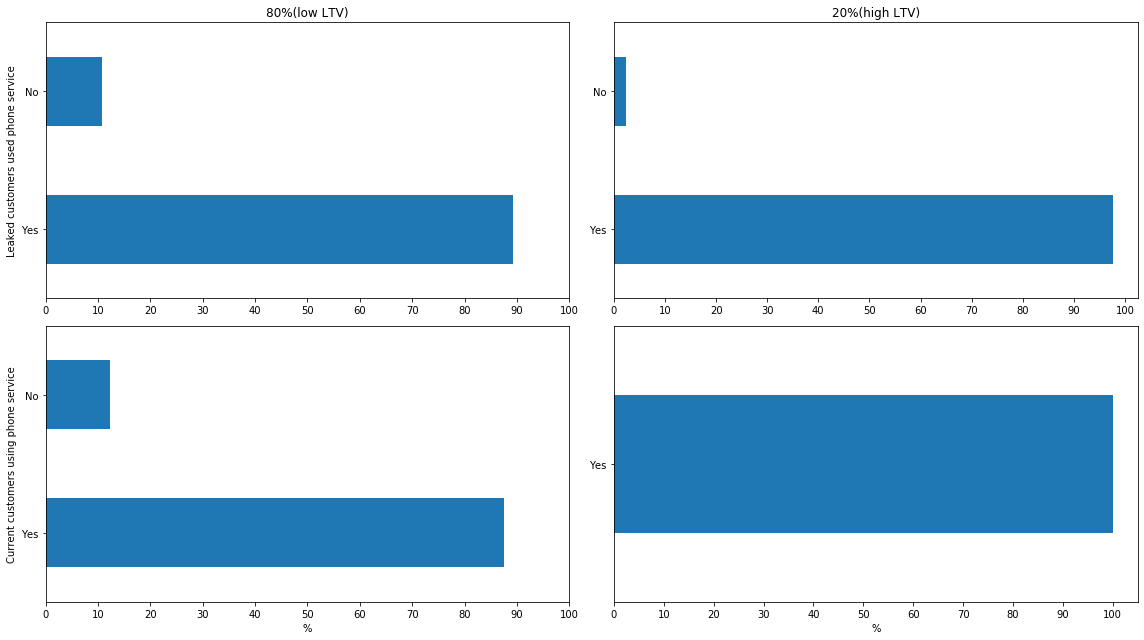

In [141]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.PhoneService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(title="80%(low LTV)",ylabel='Leaked customers used phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.PhoneService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.PhoneService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(xlabel="%",ylabel='Current customers using phone service',xticks1=range(0,110,10),xticks2=range(0,110,10))

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.PhoneService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10))
plt.tight_layout()

## Research Question 3: For those who unsubscribed and still are paying the service, what are the proportion of people used and using phone service with muiltple lines?

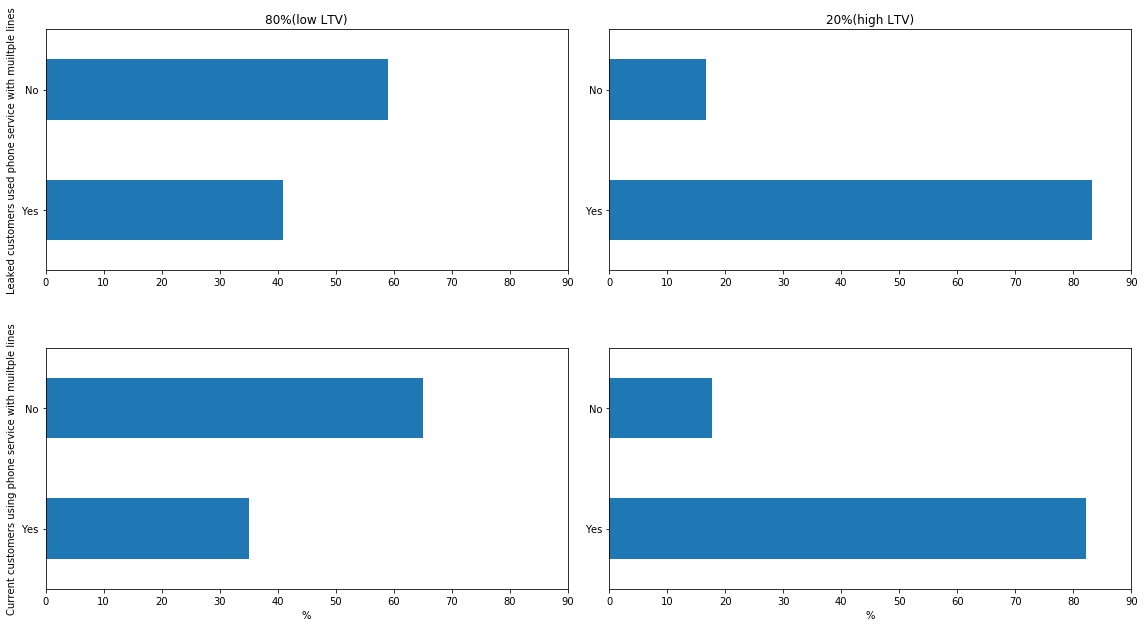

In [140]:
# Investigate the proportion of people who used phone service with muiltple lines by each groups
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
TotalCharges_under80_use_phone = TotalCharges_under80.query('PhoneService=="Yes"')
(((TotalCharges_under80_use_phone.MultipleLines.value_counts()/TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Leaked customers used phone service with muiltple lines', title="80%(low LTV)",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
TotalCharges_above80_use_phone = TotalCharges_above80.query('PhoneService=="Yes"')
((TotalCharges_above80_use_phone.MultipleLines.value_counts()/TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,100,10),xticks2=range(0,100,10));

# Investigate the proportion of people who used phone service withn muiltple lines by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Current customers using phone service with muiltple lines', xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc( xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.tight_layout()

## Research Question 4: For those who unsubscribed and still are paying the service, what are the proportion of people used and using internet service?

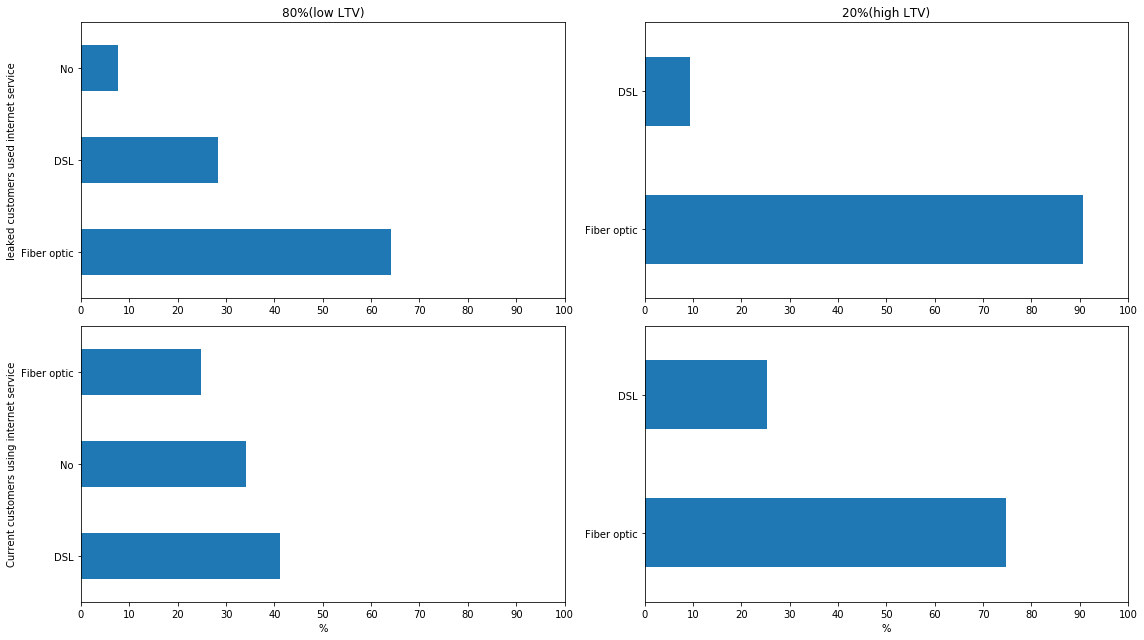

In [139]:
# Visualization
plt.figure(figsize = [16, 9])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((TotalCharges_under80.InternetService.value_counts()/TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='leaked customers used internet service',title="80%(low LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((TotalCharges_above80.InternetService.value_counts()/TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV)", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='Current customers using internet service', xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.tight_layout()

## Research Question 5: For those who unsubscribed and still are paying the service, what are the proportion of people used and using each subset of internet service?

In [71]:
# Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service"
TotalCharges_under80_use_internet = TotalCharges_under80.query('InternetService!="No"')
proportion_internet_sub_service = np.array([TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0],
TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_under80_use_internet.shape[0]])*100

# Extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service_above80"
TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
proportion_internet_sub_service_above80 = np.array([TotalCharges_above80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('TechSupport=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],                                                
TotalCharges_above80_use_internet.query('OnlineBackup=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('DeviceProtection=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingTV=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0],
TotalCharges_above80_use_internet.query('StreamingMovies=="Yes"').shape[0]/TotalCharges_above80_use_internet.shape[0]])*100

# Extract 80% with low LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service"
paying_TotalCharges_under80_use_internet = paying_TotalCharges_under80.query('InternetService!="No"')
paying_proportion_internet_sub_service_under80 = np.array([paying_TotalCharges_under80_use_internet.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0],
paying_TotalCharges_under80_use_internet.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_under80_use_internet.shape[0]])*100

# Extract 20% with high LTV who used the internet service, and save each proportion of subsets of internet service 
#in the variable "proportion_internet_sub_service_above80"
paying_TotalCharges_above80_use_internet = TotalCharges_above80.query('InternetService!="No"')
paying_proportion_internet_sub_service_above80 = np.array([paying_TotalCharges_above80.query('OnlineSecurity=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('TechSupport=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],                                                
paying_TotalCharges_above80.query('OnlineBackup=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('DeviceProtection=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingTV=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0],
paying_TotalCharges_above80.query('StreamingMovies=="Yes"').shape[0]/paying_TotalCharges_above80.shape[0]])*100

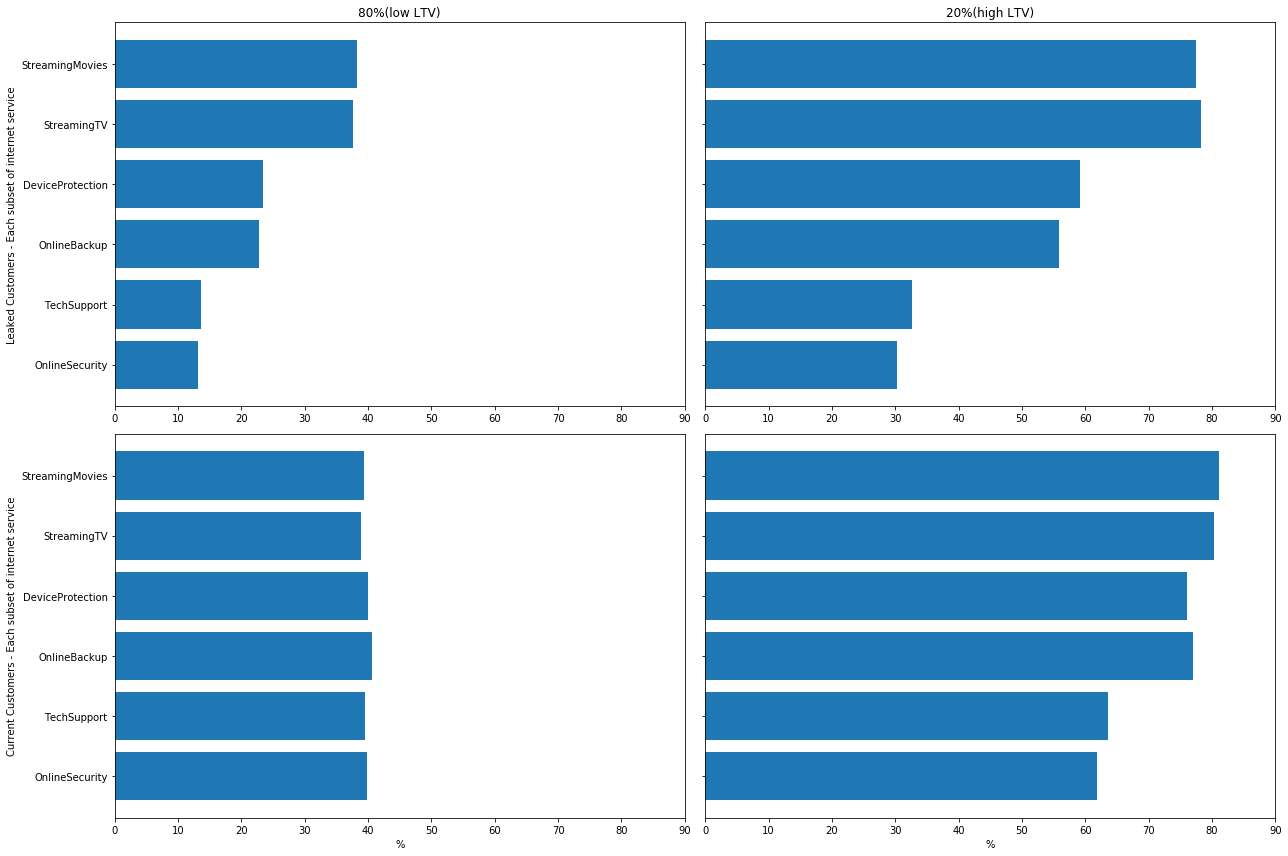

In [138]:
# Investigate the Proportion by subset of internet service by each groups
plt.figure(figsize = [18, 12])

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service)
desc(ylabel='Leaked Customers - Each subset of internet service',title='80%(low LTV)',yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), proportion_internet_sub_service_above80)
desc(title='20%(high LTV)',yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

# Investigate the Proportion by subset of internet service by each groups

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
plt.barh(range(0,6),paying_proportion_internet_sub_service_under80)
desc(ylabel='Current Customers - Each subset of internet service',xlabel="%",yticks1=range(0,6),yticks2=['OnlineSecurity','TechSupport','OnlineBackup','DeviceProtection','StreamingTV','StreamingMovies'],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
plt.barh(range(0,6), paying_proportion_internet_sub_service_above80)
desc(xlabel="%",yticks1=range(0,6),yticks2=['','','','','',''],xticks1=range(0,100,10),xticks2=range(0,100,10))
plt.tight_layout()

## Research Question 6: For those who are still in service with LTV higher than the average LTV of leaked customers, what are the differences compared to general current customers in each service?

In [84]:
# The average LTV in 80%(low LTV) of data of leaked customers is 750
# The average LTV in 20%(high LTV) of data of leaked customers is 4750

# Extract the 80%(low LTV) of data that the LTV is higher than 750
paying_TotalCharges_under80_higherthanleak = paying_TotalCharges_under80.query('TotalCharges>750')
# Extract the 20%(high LTV) of data that the LTV is higher than 4750
paying_TotalCharges_above80_higherthanleak = paying_TotalCharges_above80.query('TotalCharges>4750')

## 1. For phone service with multiple lines:

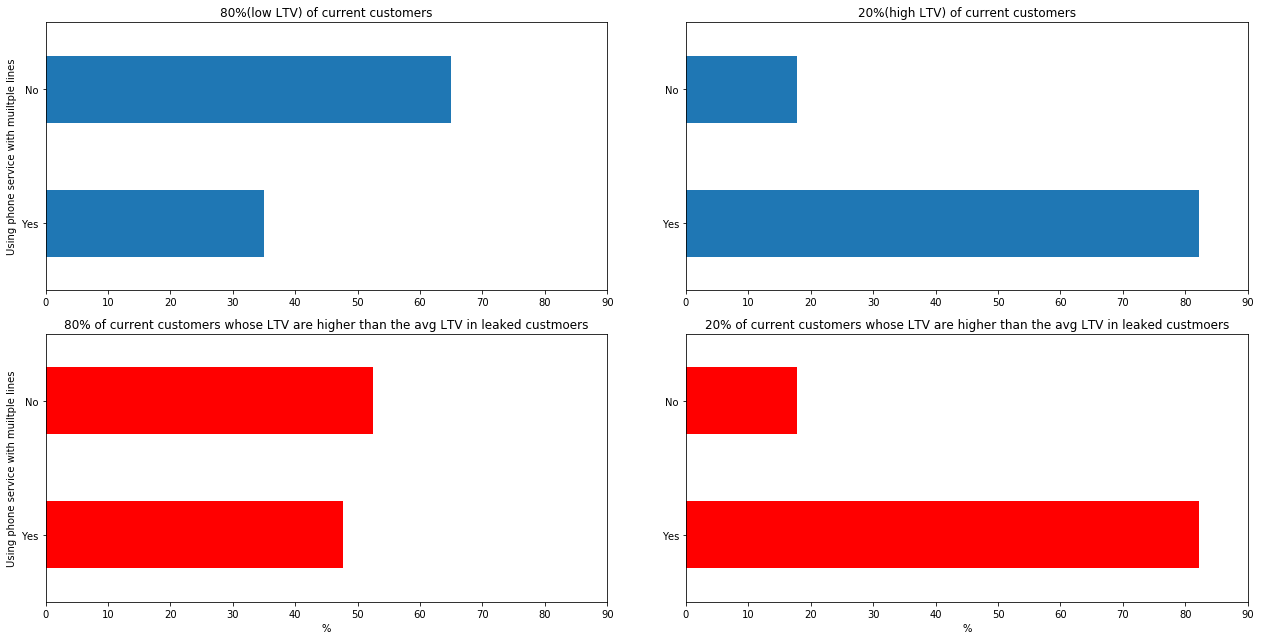

In [142]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [18, 9])
# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone = paying_TotalCharges_under80.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone.shape[0]).sort_values(ascending=True))*100).plot.barh();
desc(ylabel='Using phone service with muiltple lines', title="80%(low LTV) of current customers",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone = paying_TotalCharges_above80.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone.shape[0])*100).plot.barh();
desc(title="20%(high LTV) of current customers",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
paying_TotalCharges_under80_use_phone_higherthanleak = paying_TotalCharges_under80_higherthanleak.query('PhoneService=="Yes"')
(((paying_TotalCharges_under80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_under80_use_phone_higherthanleak.shape[0]).sort_values(ascending=True))*100).plot.barh(color='r');
desc(ylabel='Using phone service with muiltple lines',title="80% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
paying_TotalCharges_above80_use_phone_higherthanleak = paying_TotalCharges_above80_higherthanleak.query('PhoneService=="Yes"')
((paying_TotalCharges_above80_use_phone_higherthanleak.MultipleLines.value_counts()/paying_TotalCharges_above80_use_phone_higherthanleak.shape[0])*100).plot.barh(color='r');
desc(title="20% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,100,10),xticks2=range(0,100,10));
plt.tight_layout()

## 2. For internet service:

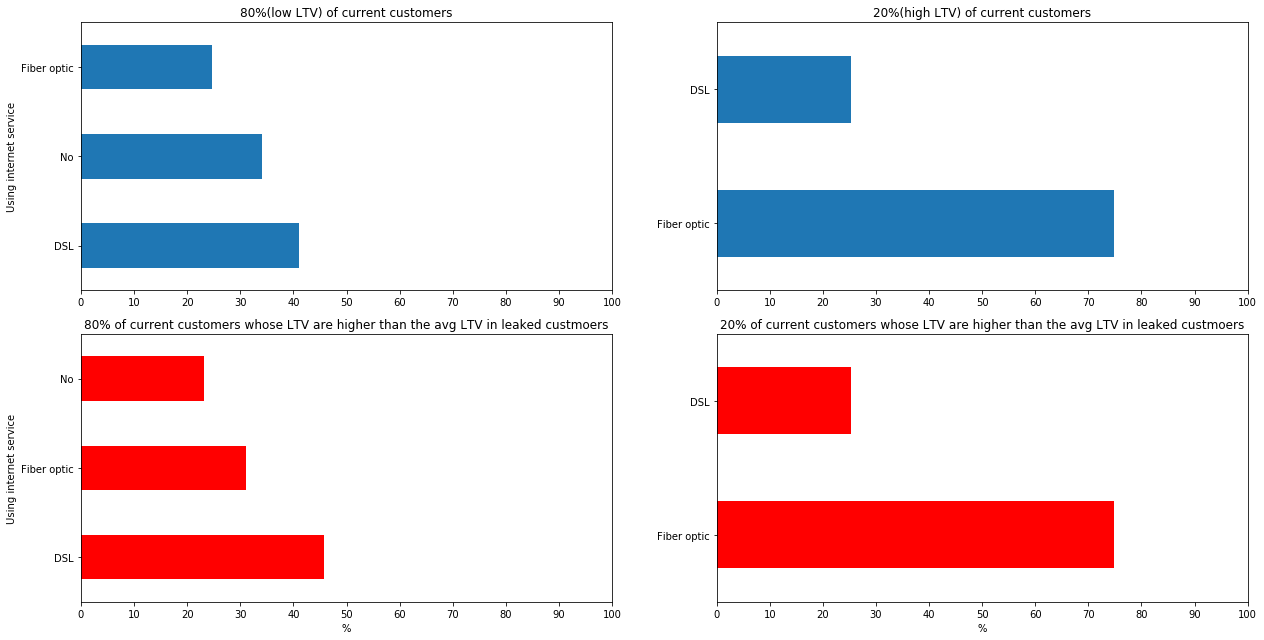

In [143]:
# Investigate the proportion of people used phone service by each groups
plt.figure(figsize = [18, 9])
# Investigate the proportion of people used phone service by each groups

plt.subplot(2, 2, 1)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80.InternetService.value_counts()/paying_TotalCharges_under80.shape[0])*100).plot.barh();
desc(ylabel='Using internet service',title="80%(low LTV) of current customers", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 2)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80.InternetService.value_counts()/paying_TotalCharges_above80.shape[0])*100).plot.barh();
desc(title="20%(high LTV) of current customers", xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 3)
# Group 1: 80%(low LTV) of data
((paying_TotalCharges_under80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_under80_higherthanleak.shape[0])*100).plot.barh(color="r");
desc(ylabel='Using internet service',title="80% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));

plt.subplot(2, 2, 4)
# Group 2: 20%(high LTV) of data
((paying_TotalCharges_above80_higherthanleak.InternetService.value_counts()/paying_TotalCharges_above80_higherthanleak.shape[0])*100).plot.barh(color="r");
desc(title="20% of current customers whose LTV are higher than the avg LTV in leaked custmoers", xlabel="%",xticks1=range(0,110,10),xticks2=range(0,110,10));
plt.tight_layout()

## Research Question 7: For two groups of those who leaked and still are paying the service, what is the proportion of each kinds of contract by each group?

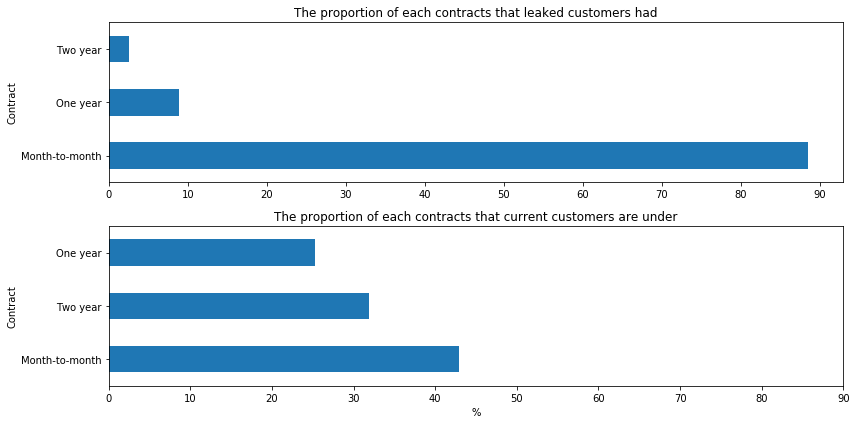

In [144]:
plt.figure(figsize = [12, 6])
# Visualize the plot of leaked customers
plt.subplot(2, 1, 1)
((Churn_df.Contract.value_counts()/Churn_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',title="The proportion of each contracts that leaked customers had")

# Visualize the plot of current customers
plt.subplot(2, 1, 2)
((paying_df.Contract.value_counts()/paying_df.shape[0])*100).plot.barh();
desc(xticks1=range(0,100,10),xticks2=range(0,100,10),ylabel='Contract',xlabel="%",title="The proportion of each contracts that current customers are under")
plt.tight_layout()

## Research Question 8: Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

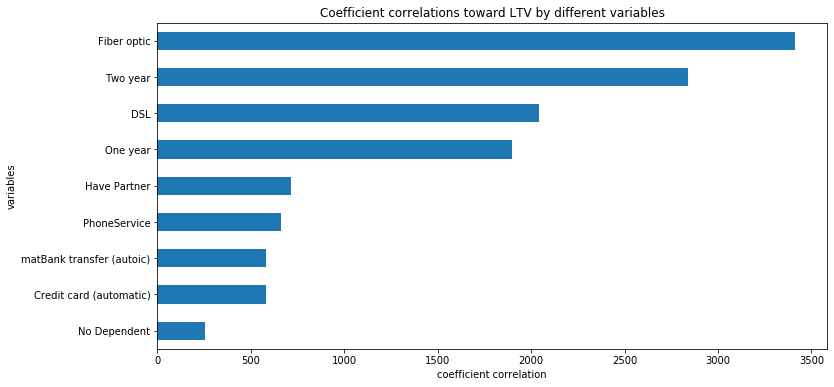

In [122]:
clean_df[['Female', 'Male']] = pd.get_dummies(clean_df['gender'])
clean_df[['No', 'Have Partner']] = pd.get_dummies(clean_df['Partner'])
clean_df[['No Dependent', 'Dependents_Yes']] = pd.get_dummies(clean_df['Dependents'])
clean_df[['No', 'PhoneService']] = pd.get_dummies(clean_df['PhoneService'])
clean_df[['DSL', 'Fiber optic', 'No']] = pd.get_dummies(clean_df['InternetService'])
clean_df[['Month-to-month', 'One year', 'Two year']] = pd.get_dummies(clean_df['Contract'])
clean_df[['matBank transfer (autoic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']] = pd.get_dummies(clean_df['PaymentMethod'])

# use mutiple linear regression
clean_df['intercept'] = 1
lm = sm.OLS(clean_df['TotalCharges'], clean_df[['intercept', 'Male', 'Have Partner', 'No Dependent',
                                               'PhoneService', 'DSL', 'Fiber optic', 'One year', 'Two year',
                                               'matBank transfer (autoic)', 'Credit card (automatic)', 
                                                'Electronic check']])
results = lm.fit()

# Visualize the order of the variables that affects LTV from high to low.
plt.figure(figsize = [12, 6])
results.params.sort_values()[3:].plot.barh()
desc(xlabel="coefficient correlation", ylabel='variables',title='Coefficient correlations toward LTV by different variables');

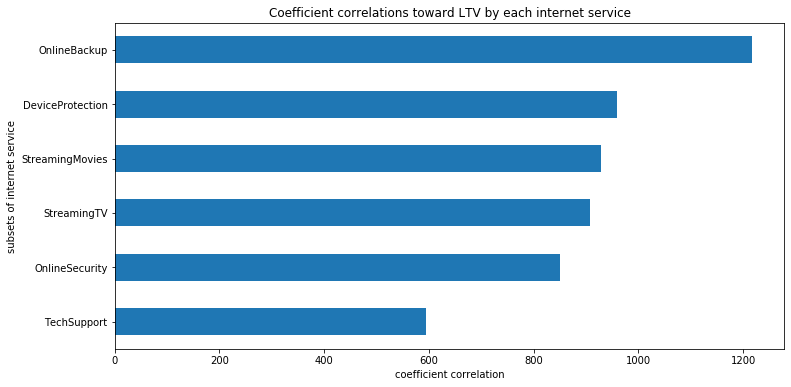

In [123]:
# convert the categorical variables to 0,1
clean_df[['No','No internet service', 'OnlineSecurity']] = pd.get_dummies(clean_df['OnlineSecurity'])
clean_df[['No','No internet service', 'OnlineBackup']] = pd.get_dummies(clean_df['OnlineBackup'])
clean_df[['No','No internet service', 'DeviceProtection']] = pd.get_dummies(clean_df['DeviceProtection'])
clean_df[['No','No internet service', 'TechSupport']] = pd.get_dummies(clean_df['TechSupport'])
clean_df[['No','No internet service', 'StreamingTV']] = pd.get_dummies(clean_df['StreamingTV'])
clean_df[['No','No internet service', 'StreamingMovies']] = pd.get_dummies(clean_df['StreamingMovies'])

# use mutiple linear regression
# and visualize the order of the variables that affects LTV from high to low.
clean_df['intercept'] = 1
lm = sm.OLS(clean_df['TotalCharges'], clean_df[['intercept', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                               'TechSupport', 'StreamingTV', 
                                                'StreamingMovies']])
results = lm.fit()
plt.figure(figsize = [12, 6])
results.params.sort_values()[1:].plot.barh();
desc(xlabel="coefficient correlation", ylabel='subsets of internet service',title='Coefficient correlations toward LTV by each internet service');